<a href="https://colab.research.google.com/github/darshan-jain/19CSE304-FDS/blob/main/DS_Case_Study_Data_Imbalance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part 4 of Case Study Project for Foundations of Data Science Course

Importing header files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import warnings
#import pandas_profiling as ppf
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/darshan-jain/19CSE304-FDS/main/CardioGoodFitness.csv")

Basic Commands to Understand the dataset

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
dfc =df

In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No null values in the dataset.

EDA : 

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Observations: 

Age lies between 18 and 50 with the mean being approx 29. 

As there is not much difference in mean and median, the skewness in data is minimal

Customers with income range of USD 29,500 to USD 104,500 are using treadmill

Considering the difference between mean and median & mean being greater than median, the data is right skewed

Standard deviation is very high

In [ ]:
df.Product.value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

TM195 is the most sold model

TM798 is the least sold model

Similar analysis can be done using other fields such as Marital Status and Gender. 

In [ ]:
df[df['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


Analysis for TM195 is done. 

In [ ]:
df.groupby('Product')['Age'].mean()

Product
TM195    28.55
TM498    28.90
TM798    29.10
Name: Age, dtype: float64

Here analysis is done for Products based on age. 

we group by product based on the age and find the mean out. 

In [ ]:
df.corr()

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


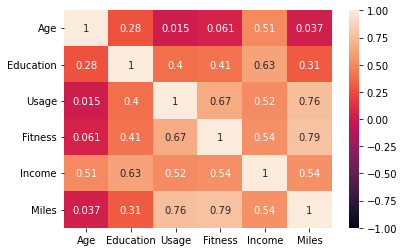

In [ ]:
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1) 
plt.show()


From the above snippets of code we derive the correlation between all the numerical columns

we observe that the following attributes show respective correlation amoung them:

Fitness and Miles  - High

Miles and Usage - High

Income and Usage - Low

Age and Usage - Low



Encoding:

In [ ]:
df = pd.get_dummies(df, columns=['MaritalStatus'])
df.head()

,Product,Age,Gender,Education,Usage,Fitness,Income,Miles,MaritalStatus_Partnered,MaritalStatus_Single
0,TM195,18,Male,14,3,4,29562,112,0,1
1,TM195,19,Male,15,2,3,31836,75,0,1
2,TM195,19,Female,14,4,3,30699,66,1,0
3,TM195,19,Male,12,3,3,32973,85,0,1
4,TM195,20,Male,13,4,2,35247,47,1,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


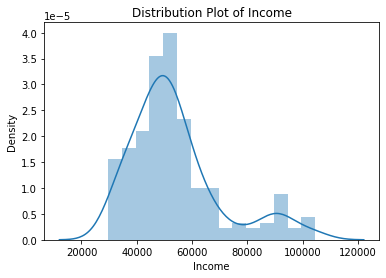

In [ ]:
sns.distplot(df.Income)
plt.title("Distribution Plot of Income")
plt.show()

Skewdness:

In [ ]:
df.skew(axis = 0, skipna = True)

Age                        0.982161
Education                  0.622294
Usage                      0.739494
Fitness                    0.454800
Income                     1.291785
Miles                      1.724497
MaritalStatus_Partnered   -0.387943
MaritalStatus_Single       0.387943
dtype: float64

In [ ]:
products = np.unique(df['Product'], return_counts=True)
print('products = {}\n'.format(products))

products = (array(['TM195', 'TM498', 'TM798'], dtype=object), array([80, 60, 40]))



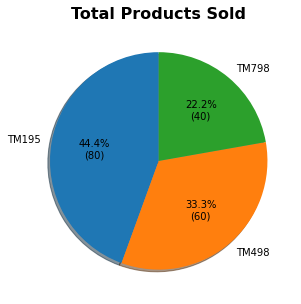

In [ ]:
def spec(x):
    return '{:.1f}%\n({:.0f})'.format(x, np.sum(products[1])*x/100);

#create pie chart of products sold
fig = plt.figure(figsize=[5,5]);
patches, texts, autotexts = plt.pie(list(products[1]),labels=list(products[0]), autopct=spec, shadow=True, startangle=90);

plt.title('Total Products Sold', fontsize=16, fontweight='bold');

Hypotheses

Age and Product can be related .


Different Genders may prefer different product.


Fit people may have different product preference based on the features offered. 


Most Sold product and logical reasons behind it. 


We see that not many features are linearly related, so linear regression would not give us a good result for predictive analysis. 

Moreover, predictive analysis could be done better using decision tree since many of the features of this dataset are yes/no (binary) attributes. 


From this entire notebook, we come to understand the importance of data and how it could solve real-world business problems. 



Feature Selection and Dataset Imbalance Handling


In [3]:
dfe = df

In [4]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dfe['Product']= label_encoder.fit_transform(dfe['Product'])
 
dfe['Product'].unique()

array([0, 1, 2])

In [7]:
dfe['MaritalStatus']=label_encoder.fit_transform(dfe['MaritalStatus'])
dfe.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,Male,14,1,3,4,29562,112
1,0,19,Male,15,1,2,3,31836,75
2,0,19,Female,14,0,4,3,30699,66
3,0,19,Male,12,1,3,3,32973,85
4,0,20,Male,13,0,4,2,35247,47


In [8]:
dfe['Gender']=label_encoder.fit_transform(dfe['Gender'])
dfe.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,0,18,1,14,1,3,4,29562,112
1,0,19,1,15,1,2,3,31836,75
2,0,19,0,14,0,4,3,30699,66
3,0,19,1,12,1,3,3,32973,85
4,0,20,1,13,0,4,2,35247,47


In [9]:
X = dfe.loc[:, dfe.columns != 'Gender']
y = dfe['Gender']

In [10]:
from sklearn.model_selection import train_test_split
 
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
 
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (126, 8)
Number transactions y_train dataset:  (126,)
Number transactions X_test dataset:  (54, 8)
Number transactions y_test dataset:  (54,)


In [11]:
# logistic regression object
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
lr = LogisticRegression()
 
# train the model on train set
lr.fit(X_train, y_train.ravel())
 
predictions = lr.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.24      0.36        21
           1       0.66      0.94      0.78        33

    accuracy                           0.67        54
   macro avg       0.69      0.59      0.57        54
weighted avg       0.68      0.67      0.61        54



In [12]:
f1_score(y_test, predictions, average='macro')

0.5660714285714286

In [13]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
 
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
 
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 71
Before OverSampling, counts of label '0': 55 

After OverSampling, the shape of train_X: (142, 8)
After OverSampling, the shape of train_y: (142,) 

After OverSampling, counts of label '1': 71
After OverSampling, counts of label '0': 71


In [14]:
lr1 = LogisticRegression()
lr1.fit(X_train_res, y_train_res.ravel())
predictions = lr1.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57        21
           1       0.73      0.58      0.64        33

    accuracy                           0.61        54
   macro avg       0.62      0.62      0.61        54
weighted avg       0.64      0.61      0.62        54



In [ ]:
f1_score(y_test, predictions, average='macro')

0.6077481840193706

In [ ]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))
 
# apply near miss
from imblearn.under_sampling import NearMiss
nr = NearMiss()
 
X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel())
 
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape))
 
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1)))
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

Before Undersampling, counts of label '1': 71
Before Undersampling, counts of label '0': 55 

After Undersampling, the shape of train_X: (110, 8)
After Undersampling, the shape of train_y: (110,) 

After Undersampling, counts of label '1': 55
After Undersampling, counts of label '0': 55


In [ ]:
lr2 = LogisticRegression()
lr2.fit(X_train_miss, y_train_miss.ravel())
predictions = lr2.predict(X_test)
 
# print classification report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.39      1.00      0.56        21
           1       0.00      0.00      0.00        33

    accuracy                           0.39        54
   macro avg       0.19      0.50      0.28        54
weighted avg       0.15      0.39      0.22        54



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
f1_score(y_test, predictions, average='macro')

0.28

Higher the F1 Score the better, So with this we understand that SMOTE works better in this case. 

In [ ]:
prod_gen_fit=pd.crosstab(index=dfc['Product'],columns=[dfc['Gender'],dfc['Fitness']])
prod_gen_fit

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
TM195        0  10  26  3  1    1  4  28  6   1
TM498        1   6  18  4  0    0  6  21  4   0
TM798        0   0   1  1  5    0  0   3  6  24

In [ ]:
pd.pivot_table(dfc,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [ ]:
dfc.groupby(dfc.Product).mean()

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [ ]:
#exporting data to a matrimonial firm 
# data required = age,gender & Marital Status == Single
df_e = dfc.loc[dfc['MaritalStatus']=='Single']

In [ ]:
df_ef = df_e[['Age','Gender']]

In [ ]:
df_ef.head()

,Age,Gender
0,18,Male
1,19,Male
3,19,Male
7,21,Male
8,21,Male
